In [5]:
import numpy as np
import sys
from matplotlib import pyplot as plt
sys.path.append('src')
from geometry import cap

In [6]:
p2 = np.array([0,0])
p1 = np.array([1,0])
c = cap(p1, p2)

In [8]:
c.build()

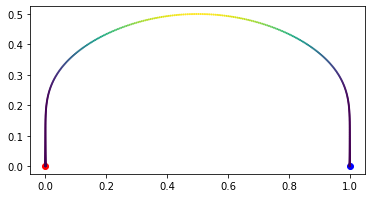

In [9]:
fig,ax = plt.subplots()
ax.scatter(*p1, c='b')
ax.scatter(*p2, c='r')
ax.scatter(c.x, c.y, c=c.v,s=1)
ax.set_aspect('equal')